# Mappeoppgave 5

Laster inn nødvendige pakker og dataen jeg skal bruke i oppgaven.

In [29]:
import pandas as pd
import numpy as np 

url = "https://worldpopulationreview.com/country-rankings/gdp-per-capita-by-country"
df = pd.read_html(url, header = 0)
df

[     Ranking                   Country GDP per Capita  2022 Population
 0          1                Luxembourg       $118,001           642371
 1          2                 Singapore        $97,057          5943546
 2          3                   Ireland        $94,392          5020199
 3          4                     Qatar        $93,508          2979915
 4          5               Switzerland        $72,874          8773637
 ..       ...                       ...            ...              ...
 180      190                    Malawi           $993         20180839
 181      191  Central African Republic           $979          5016678
 182      192                   Somalia           $925         16841795
 183      193               South Sudan           $791         11618511
 184      194                   Burundi           $760         12624840
 
 [185 rows x 4 columns]]

Kjører index 0 i listen.

In [28]:
df[0]

,Ranking,Country,GDP per Capita,2022 Population
0,1,Luxembourg,"$118,001",642371
1,2,Singapore,"$97,057",5943546
2,3,Ireland,"$94,392",5020199
3,4,Qatar,"$93,508",2979915
4,5,Switzerland,"$72,874",8773637
...,...,...,...,...
180,190,Malawi,$993,20180839
181,191,Central African Republic,$979,5016678
182,192,Somalia,$925,16841795
183,193,South Sudan,$791,11618511


Henter dataframen ut av lista.

In [27]:
df2022 = df[0]

Gir meg fasongen på dataframen, og kaller det restriction for å bruke senere.

In [26]:
restriction = df2022.shape

Lager liste over variablene jeg skal bruke i plottet. Dette gjør jeg siden plottet ikke ville kjøre riktig uten å fjerne dollartegn og mellomrom.

In [25]:
gdp_liste = list()

for i in range(restriction[1]):
    if i != 2:
        continue
    for j in range(restriction[0]):
        k = df2022.values[j][i]
        k = k.strip("$")
        values_list = k.split(",")
        gdp_liste.append(int("".join(values_list)))
        
population_liste = list()
for i in range(restriction[1]):
    if i != 3:
        continue
    for j in range(restriction[0]):
        k = df2022.values[j][i]
        population_liste.append(int(k))

Lager et plot over dataen jeg har henta.

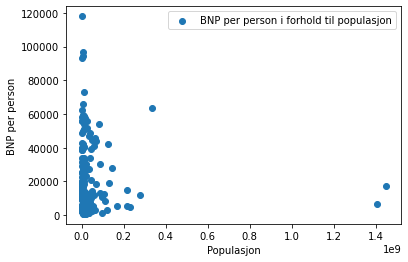

In [24]:
from matplotlib import pyplot as plt

fig, ax=plt.subplots()

ax.set_ylabel('BNP per person')
ax.set_xlabel('Populasjon')


ax.scatter(population_liste, gdp_liste, label = 'BNP per person i forhold til populasjon')
ax.legend(loc='upper right',frameon=True)

Plotter de samme variablene ved bruk av logaritmefunksjonen til numpy.

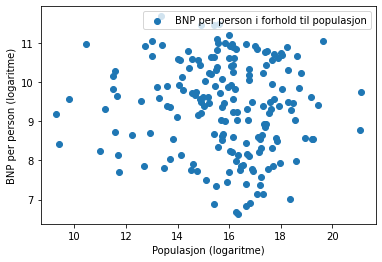

In [23]:
fig, ax=plt.subplots()

ax.set_ylabel('BNP per person (logaritme)')
ax.set_xlabel('Populasjon (logaritme)')


ax.scatter(np.log(population_liste), np.log(gdp_liste), label = 'BNP per person i forhold til populasjon')
ax.legend(loc='upper right',frameon=True)

In [8]:
y=np.log(gdp_liste)
pd.DataFrame(y)

,0
0,11.678448
1,11.483054
2,11.455212
3,11.445802
4,11.196487
...,...
180,6.900731
181,6.886532
182,6.829794
183,6.673298


In [9]:
x=pd.DataFrame(np.log(population_liste))
x['intercept']=1
x

,0,intercept
0,13.372921,1
1,15.597816,1
2,15.428980,1
3,14.907405,1
4,15.987262,1
...,...,...
180,16.820244,1
181,15.428279,1
182,16.639374,1
183,16.268110,1


Laster inn pakke for å kunne regne ut koeffesienter og lage regresjonslinje.

In [10]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9122
Date:                Sun, 03 Apr 2022   Prob (F-statistic):              0.341
Time:                        21:40:11   Log-Likelihood:                -293.19
No. Observations:                 185   AIC:                             590.4
Df Residuals:                     183   BIC:                             596.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0396      0.041     -0.955      0.3

In [11]:
res.params

0           -0.039629
intercept    9.979318
dtype: float64

Legger til en regresjonslinje i plottet

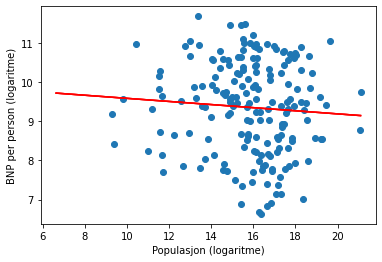

In [21]:
x=np.linspace(min(np.log(gdp_liste)), max(np.log(population_liste)), 100)

regression_line=res.params['intercept']+res.params[0]*x

ax.plot(x, regression_line,color='red')
fig

Til slutt kan vi konkludere med at det er svært liten korrelasjon mellom BNP per person og befolkningen i landet. Likevel ser vi at BNP per person minker reduseres litt jo større populasjonen i landet er.